In [6]:
#import data here
# https://arl.wpi.edu/corrosion_dataset/
# dont forget to implement famous models comparison!

# dateset janlup di augmentasi
# prioritasin kodingan
# pengulangan diulang sampe dapet yang udh paling pas
# alur hyperparameternya resizing optimizer epoch batch size learning rate
# optimizer dicoba semua
# sama disaranin pake augmentasi otomatis

In [7]:
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator

In [8]:
DATA_DIR = "./Dataset Korosi/"

In [9]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
    )

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    
)

train_generator = training_datagen.flow_from_directory(DATA_DIR, batch_size=32,class_mode='categorical',target_size=(150,150))   
val_generator = train_generator = training_datagen.flow_from_directory(DATA_DIR, subset='validation', batch_size=32,class_mode='categorical',target_size=(150,150))   

Found 304 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


## Regular 2x CNN model

In [10]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(3,activation='softmax')
    ])
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])
history = model.fit(train_generator,validation_data=val_generator,epochs=15)

Epoch 1/15


2022-10-29 02:21:08.420070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 13.7241 - acc: 0.2833

2022-10-29 02:21:13.811483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 9s 6s/step - loss: 13.7241 - acc: 0.2833 - val_loss: 6.6167 - val_acc: 0.4833
Epoch 2/15
2/2 [==============================] - 7s 5s/step - loss: 7.2311 - acc: 0.4000 - val_loss: 3.4232 - val_acc: 0.2000
Epoch 3/15
2/2 [==============================] - 7s 4s/step - loss: 2.6409 - acc: 0.4167 - val_loss: 1.0036 - val_acc: 0.5667
Epoch 4/15
2/2 [==============================] - 7s 5s/step - loss: 0.9865 - acc: 0.4833 - val_loss: 1.1347 - val_acc: 0.3167
Epoch 5/15
2/2 [==============================] - 7s 5s/step - loss: 1.0264 - acc: 0.4833 - val_loss: 0.8973 - val_acc: 0.8000
Epoch 6/15
2/2 [==============================] - 7s 5s/step - loss: 0.8822 - acc: 0.7667 - val_loss: 1.1261 - val_acc: 0.3167
Epoch 7/15
2/2 [==============================] - 7s 5s/step - loss: 0.9838 - acc: 0.5333 - val_loss: 0.8556 - val_acc: 0.7667
Epoch 8/15
2/2 [==============================] - 7s 5s/step - loss: 0.8422 - acc: 0.8000 - val_loss: 0.7633 - val_acc: 0

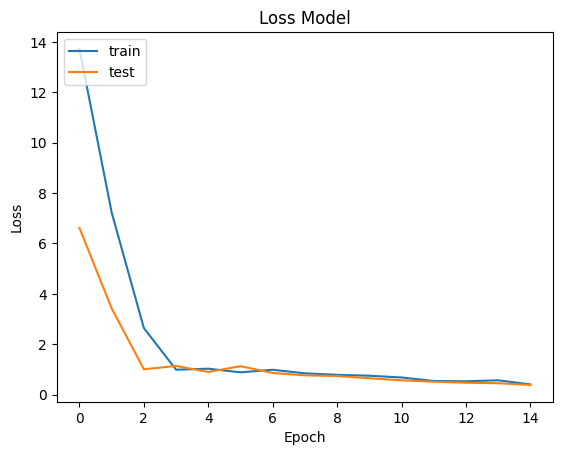

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

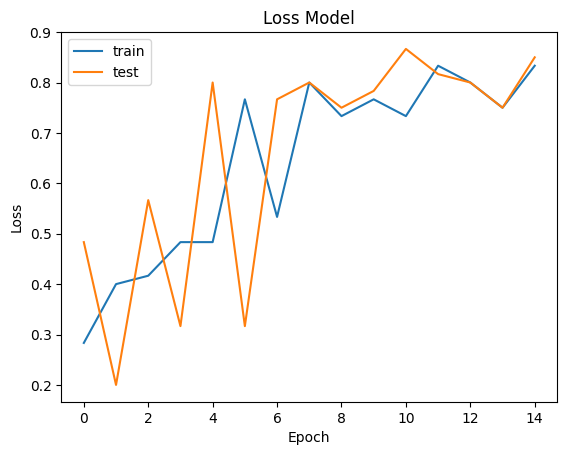

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## MobileNet v2, on 5 epochs, imagenet weight

In [28]:
mobilenet = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(150,150,3),
    weights='imagenet',
    include_top=False,
)

In [33]:
model_mobilenet = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer( input_shape=(150,150,3)),
    mobilenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])
model_mobilenet.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])
history = model_mobilenet.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5


2022-10-29 02:52:10.740341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 5.8883 - acc: 0.5500 

2022-10-29 02:52:25.042246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 19s 9s/step - loss: 5.8883 - acc: 0.5500 - val_loss: 6.1236 - val_acc: 0.7167
Epoch 2/5
2/2 [==============================] - 7s 5s/step - loss: 6.9872 - acc: 0.5333 - val_loss: 14.3423 - val_acc: 0.6667
Epoch 3/5
2/2 [==============================] - 7s 5s/step - loss: 0.4950 - acc: 0.9333 - val_loss: 68.0496 - val_acc: 0.5667
Epoch 4/5
2/2 [==============================] - 7s 5s/step - loss: 0.5937 - acc: 0.9500 - val_loss: 94.3526 - val_acc: 0.5167
Epoch 5/5
2/2 [==============================] - 7s 5s/step - loss: 1.4210 - acc: 0.9667 - val_loss: 78.1125 - val_acc: 0.6167


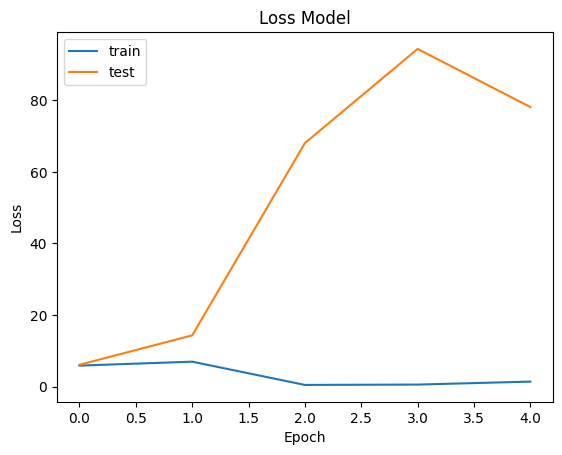

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

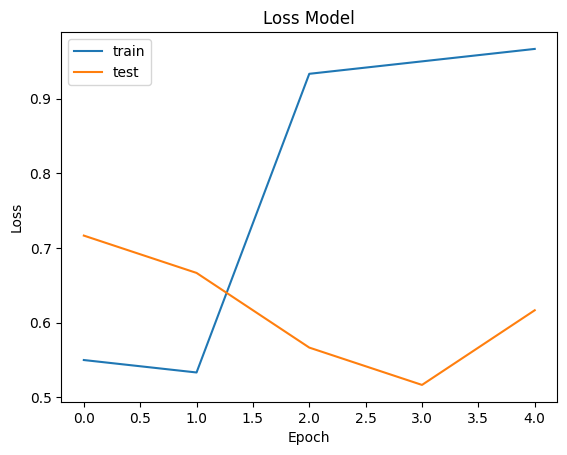

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Resnet50, on 5 epochs imagenet

In [37]:
resnet = tf.keras.applications.ResNet50(
    input_shape=(150,150,3),
    weights='imagenet',
    include_top=False,
)

94765736/94765736 [==============================] - 11s 0us/step


In [38]:
model_resnet = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer( input_shape=(150,150,3)),
    resnet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])
model_resnet.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])
history = model_resnet.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5


2022-10-29 03:05:32.574152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 49.3870 - acc: 0.3500

2022-10-29 03:05:43.244902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 16s 8s/step - loss: 49.3870 - acc: 0.3500 - val_loss: 95.3760 - val_acc: 0.2000
Epoch 2/5
2/2 [==============================] - 8s 5s/step - loss: 32.3366 - acc: 0.4667 - val_loss: 355.8090 - val_acc: 0.2000
Epoch 3/5
2/2 [==============================] - 8s 6s/step - loss: 1.1440 - acc: 0.6500 - val_loss: 8612.3311 - val_acc: 0.2000
Epoch 4/5
2/2 [==============================] - 8s 5s/step - loss: 1.0708 - acc: 0.6667 - val_loss: 82978.0547 - val_acc: 0.2000
Epoch 5/5
2/2 [==============================] - 7s 5s/step - loss: 0.8542 - acc: 0.8000 - val_loss: 105345.7891 - val_acc: 0.2000


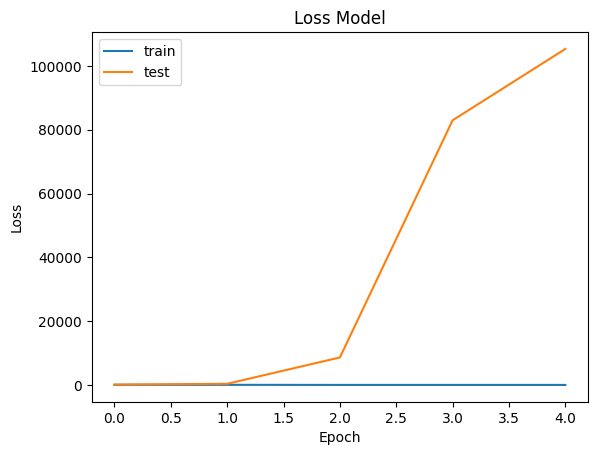

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

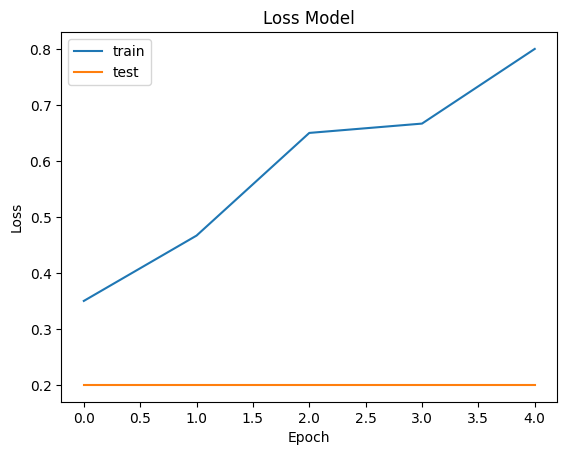

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()